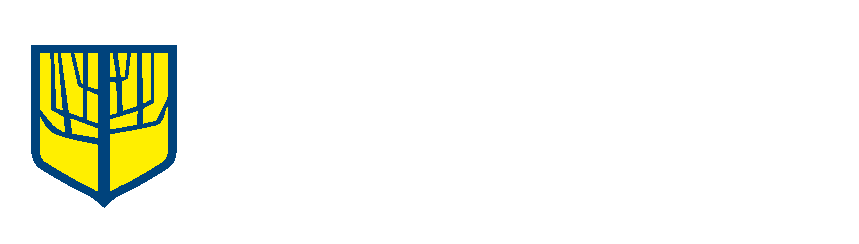

**Universidad Sergio Arboleda**

*Programa Ciencias de la Computación e Inteligencia Artificial*

*Autor: Esteban Rodriguez - Daniel Velásquez*

*Fecha: Abril 2023*

*Tópico: Parcial 2*

*Materia: Aprendizaje de Máquina*


#Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, SGDRegressor, LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# PARTE 1 


Usando el dataset de diabetes,  dividir en train y test con un random_state de 42 y test_size de 0.3:
https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv


Implementar y entrenar una regresión logística con descenso del gradiente creando las siguientes funciones:

def cost_function(y, y_hat): 

def predict(x…w…b):

def predict_proba(x…w…b):

def get_gradients(x, … y_train, y_hat,w  … b):

def update_params(w, …, b, dw, …, db, learning_rate=0.1)

def reg_log(x1.., …, y, niter=100, learning_rate=0.1

**se debe imprimir el costo en cada iteración

##Manejo de datos

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

Separacion de datos en train y test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Funciones

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -250, 250)))


def cost_function(y, y_hat):
    m = y.shape[0]
    epsilon = 1e-10 # Pequeña cantidad para evitar errores de logaritmo
    J = -1/m * np.sum(y * np.log(y_hat + epsilon) + (1-y) * np.log(1-y_hat + epsilon))
    return J


def predict(x, w, b):
    z = np.dot(x, w) + b
    y_hat = sigmoid(z)
    y_pred = np.round(y_hat)
    return y_pred

def predict_proba(x, w, b):
    z = np.dot(x, w) + b
    y_hat = sigmoid(z)
    return y_hat

def get_gradients(x, y, y_hat, w, b):
    m = y.shape[0]
    dz = y_hat - y
    dw = 1/m * np.dot(x.T, dz)
    db = 1/m * np.sum(dz)
    return dw, db

def update_params(w, b, dw, db, learning_rate=0.1):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

def reg_log(x, y, n_iter=100, learning_rate=0.1):
    m, n = x.shape

    # Inicializa los pesos y el sesgo con valores aleatorios
    w = np.random.randn(n)
    b = np.random.randn()

    # Inicializa la lista de costos
    costs = []

    # Itera n_iter veces
    for i in range(n_iter):

        # Calcula las probabilidades y la función de costo
        y_hat = predict_proba(x, w, b)
        J = cost_function(y, y_hat)

        # Calcula los gradientes de los pesos y el sesgo
        dw, db = get_gradients(x, y, y_hat, w, b)

        # Actualiza los pesos y el sesgo utilizando los gradientes y una tasa de aprendizaje
        w, b = update_params(w, b, dw, db, learning_rate)

        # Agrega el costo actual a la lista de costos
        costs.append(J)

        # Imprime el costo cada 10 iteraciones
        if i % 10 == 0:
            print(f"Iteración {i}: Costo = {J}")

    # Devuelve los pesos y el sesgo entrenados y la lista de costos
    return w, b, costs

##a) Calcular accuracy en train y test


In [6]:
# Entrenar el modelo de regresión logística
w, b, costo = reg_log(X_train, y_train, n_iter=10000, learning_rate=0.1)

# Hacer predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = predict(X_train, w, b)
y_test_pred = predict(X_test, w, b)

# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_accuracy = np.mean(y_train_pred == y_train)
test_accuracy = np.mean(y_test_pred == y_test)

Iteración 0: Costo = 7.94296900632075
Iteración 10: Costo = 7.953854379299697
Iteración 20: Costo = 7.099742297642152
Iteración 30: Costo = 8.061191759392749
Iteración 40: Costo = 7.492958507360834
Iteración 50: Costo = 7.397714995944926
Iteración 60: Costo = 8.061191759392749
Iteración 70: Costo = 8.061191759392749
Iteración 80: Costo = 8.061191759392749
Iteración 90: Costo = 6.9113281696123945
Iteración 100: Costo = 7.296477326095744
Iteración 110: Costo = 7.030243800393325
Iteración 120: Costo = 8.061191759392749
Iteración 130: Costo = 7.622912203853005
Iteración 140: Costo = 6.629947189985252
Iteración 150: Costo = 14.921780490875939
Iteración 160: Costo = 7.478951851922485
Iteración 170: Costo = 6.574466835122681
Iteración 180: Costo = 7.226033860721633
Iteración 190: Costo = 6.663530433594772
Iteración 200: Costo = 7.063141458788768
Iteración 210: Costo = 6.421379068896957
Iteración 220: Costo = 8.17324794098974
Iteración 230: Costo = 11.986335483416948
Iteración 240: Costo = 6.9

In [7]:
print(f"Precisión en entrenamiento: {round(train_accuracy*100, 2)} % ")
print(f"Precisión en prueba: {round(test_accuracy*100, 2)} % ")

Precisión en entrenamiento: 69.27 % 
Precisión en prueba: 70.13 % 


##b) Utilizar SGDClassifier y LogisticRegression de SKLearn para crear otros 2 modelos. Revisar valores de costo, y evaluar accuracy en train y test. Analizar coeficientes y comparar resultados con los de su código.


### SGDClassifier

In [8]:
# Crear modelo con SGDClassifier
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train, y_train)

# Calcular el costo y la precisión en el conjunto de entrenamiento y prueba
sgd_train_cost = sgd_model.score(X_train, y_train)
sgd_test_cost = sgd_model.score(X_test, y_test)
sgd_train_acc = accuracy_score(y_train, sgd_model.predict(X_train))
sgd_test_acc = accuracy_score(y_test, sgd_model.predict(X_test))

# Imprimir resultados
print("SGDClassifier:")
print(" Costo en entrenamiento:", round(sgd_train_cost*100, 2), " %")
print(" Costo en prueba:", round(sgd_test_cost*100, 2), " %")
print(" Precisión en entrenamiento:", round(sgd_train_acc*100, 2), " %")
print(" Precisión en prueba:", round(sgd_test_acc*100, 2), " %")

SGDClassifier:
 Costo en entrenamiento: 35.57  %
 Costo en prueba: 35.06  %
 Precisión en entrenamiento: 35.57  %
 Precisión en prueba: 35.06  %


In [9]:
print("Coeficientes de SGDClassifier:")
index = 0
max_index = 0
most_important = "" 
for i in X.columns:
  print(" ",i, ": ", round(sgd_model.coef_[0][index], 2))
  if sgd_model.coef_[0][index] > max_index:
    max_index = sgd_model.coef_[0][index]
    most_important = i
  index += 1
print("La variable mas influyente en el modelo es", most_important) 

Coeficientes de SGDClassifier:
  Pregnancies :  520.62
  Glucose :  113.57
  BloodPressure :  -92.18
  SkinThickness :  29.52
  Insulin :  -9.31
  BMI :  -19.42
  DiabetesPedigreeFunction :  22.27
  Age :  12.57
La variable mas influyente en el modelo es Pregnancies


### LogisticRegression

In [10]:
# Crear modelo con LogisticRegression
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
#lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Calcular el costo y la precisión en el conjunto de entrenamiento y prueba
lr_train_cost = lr_model.score(X_train, y_train)
lr_test_cost = lr_model.score(X_test, y_test)
lr_train_acc = accuracy_score(y_train, lr_model.predict(X_train))
lr_test_acc = accuracy_score(y_test, lr_model.predict(X_test))

# Imprimir resultados
print("LogisticRegression:")
print(" Costo en entrenamiento:", round(lr_train_cost*100, 2), " %")
print(" Costo en prueba:", round(lr_test_cost*100, 2), " %")
print(" Precisión en entrenamiento:", round(lr_train_acc*100, 2), " %")
print(" Precisión en prueba:", round(lr_test_acc*100, 2), " %")

LogisticRegression:
 Costo en entrenamiento: 78.4  %
 Costo en prueba: 73.59  %
 Precisión en entrenamiento: 78.4  %
 Precisión en prueba: 73.59  %


In [11]:
print("Coeficientes de LogisticRegression:")
index = 0
max_index = 0
most_important = "" 
for i in X.columns:
  print(" ",i, ": ", round(lr_model.coef_[0][index], 2))
  if lr_model.coef_[0][index] > max_index:
    max_index = lr_model.coef_[0][index]
    most_important = i
  index += 1
print("La variable mas influyente en el modelo es", most_important) 

Coeficientes de LogisticRegression:
  Pregnancies :  0.06
  Glucose :  0.04
  BloodPressure :  -0.01
  SkinThickness :  -0.0
  Insulin :  -0.0
  BMI :  0.11
  DiabetesPedigreeFunction :  0.37
  Age :  0.04
La variable mas influyente en el modelo es DiabetesPedigreeFunction


Analisis:
* Se comparan los resultados dados en el modelo creado, y se determina que la precision del modelo creado es más similar con los resultados dados del modelo de LogisticRegressor.
* Se comparan los resultados de precision entre el modelo de SGDClassifier y LogisticRegressor, se puede comprobar que se da un mejor rendimiento usando LogisticRegressor, esto puede ser debido a que la regresion es mas idonea para los datos dados.

##c) Dibujar las muestras y la frontera de Decisión para un modelo utilizando el código creado,  usando las 30 primeras muestras del dataset de diabetes y las siguientes variables de entrada :  
    Pregnancies - Glucose - BloodPressure

### Muestras

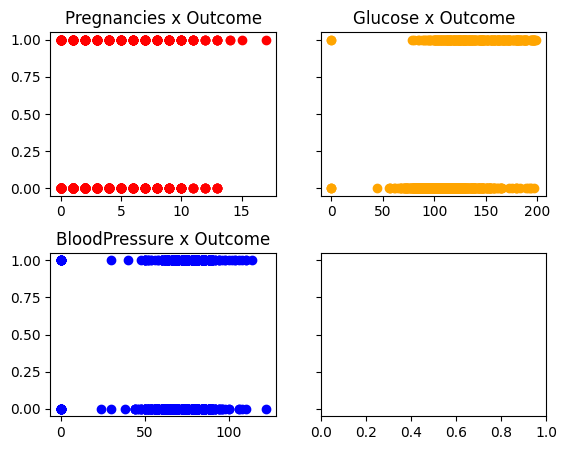

In [12]:
fig, ax = plt.subplots(2, 2, sharey = True)

ax[0, 0].set_title("Pregnancies x Outcome")
ax[0, 0].scatter(X["Pregnancies"], y, c="red")

ax[0, 1].set_title("Glucose x Outcome")
ax[0, 1].scatter(X["Glucose"], y, c="orange")

ax[1, 0].set_title("BloodPressure x Outcome")
ax[1, 0].scatter(X["BloodPressure"], y, c="blue")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show()

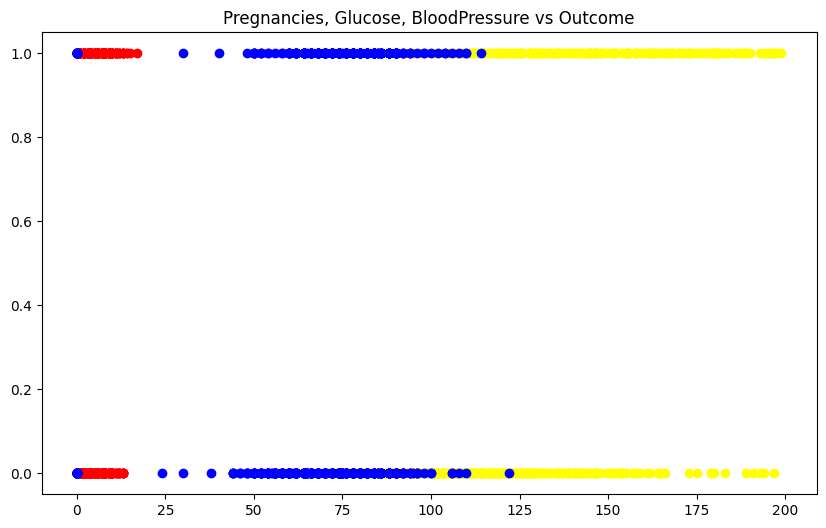

In [13]:
plt.figure(figsize=(10,6))

plt.title("Pregnancies, Glucose, BloodPressure vs Outcome")
plt.scatter(X["Pregnancies"], y, c="red")
plt.scatter(X["Glucose"], y, c="yellow")
plt.scatter(X["BloodPressure"], y, c="blue")
plt.show()

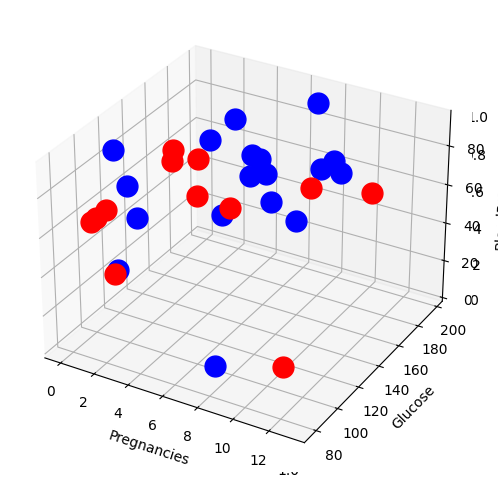

In [14]:
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111,projection='3d')

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

ax1.set_xlabel('Pregnancies')
ax1.set_ylabel('Glucose')
ax1.set_zlabel('BloodPressure')

# Datos en array bi-dimensional
x_1 = X['Pregnancies'].values[:30]
x_2 = X['Glucose'].values[:30]
x_3 = X['BloodPressure'].values[:30]

count_P = 0
count_N = 0

for i in range(30):
  if y[i] == 0:
    if count_P<1:
      ax1.plot(x_1[i],x_2[i],x_3[i], "o", markersize = 15, color="r", label='No tiene diabetes')
      count_P = 1
    else:
      ax1.plot(x_1[i],x_2[i],x_3[i], "o", markersize = 15, color="r")
  else:
    if count_N<1:
      ax1.plot(x_1[i],x_2[i],x_3[i], "o", markersize = 15, color="b", label='Tiene diabetes')
      count_N = 1
    else:
      ax1.plot(x_1[i],x_2[i],x_3[i], "o", markersize = 15, color="b")

### Frontera de decision

In [15]:
modeloA1 = DecisionTreeClassifier(max_depth=3, criterion="entropy")
arbol1 = modeloA1.fit(X[["Pregnancies", "Glucose", "BloodPressure"]].head(30), y.head(30))

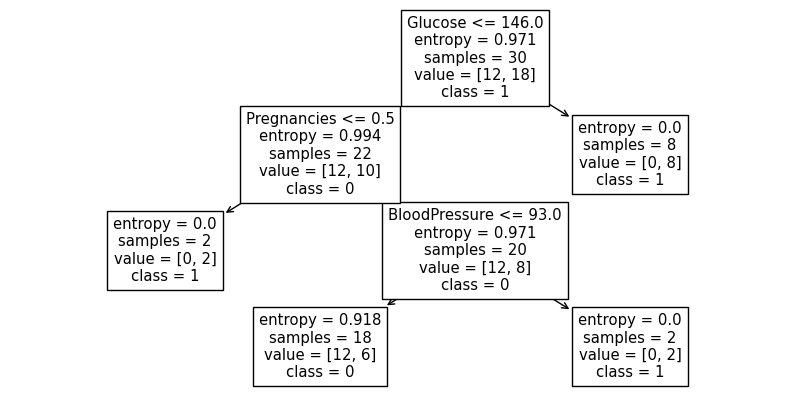

In [16]:
plt.figure(figsize=(10,5))
plot_tree(arbol1,feature_names=modeloA1.feature_names_in_,class_names=["0", "1"])
plt.show()

In [17]:
texto_modelo = export_text(
                    decision_tree = arbol1,
                    feature_names = list(X[["Pregnancies", "Glucose", "BloodPressure"]])
               )
texto_modelo = texto_modelo.replace("|",'')
texto_modelo = texto_modelo.replace("-",'')
print(texto_modelo)

 Glucose <= 146.00
    Pregnancies <= 0.50
       class: 1
    Pregnancies >  0.50
       BloodPressure <= 93.00
          class: 0
       BloodPressure >  93.00
          class: 1
 Glucose >  146.00
    class: 1



In [18]:
texto_modelo = texto_modelo.replace(" ",'')
extract = texto_modelo.split('\n')
extract.pop(len(extract)-1)
to_delete = []
for i in extract:
  if 'class' in i:
    to_delete.append(i)
  if '>' in i:
    to_delete.append(i)
for i in to_delete:
  extract.remove(i)
cond = []
for i in extract:
  cond.append(i.split('<='))
for i in range(len(cond)):
  cond[i][1] = float(cond[i][1])
cond

[['Glucose', 146.0], ['Pregnancies', 0.5], ['BloodPressure', 93.0]]

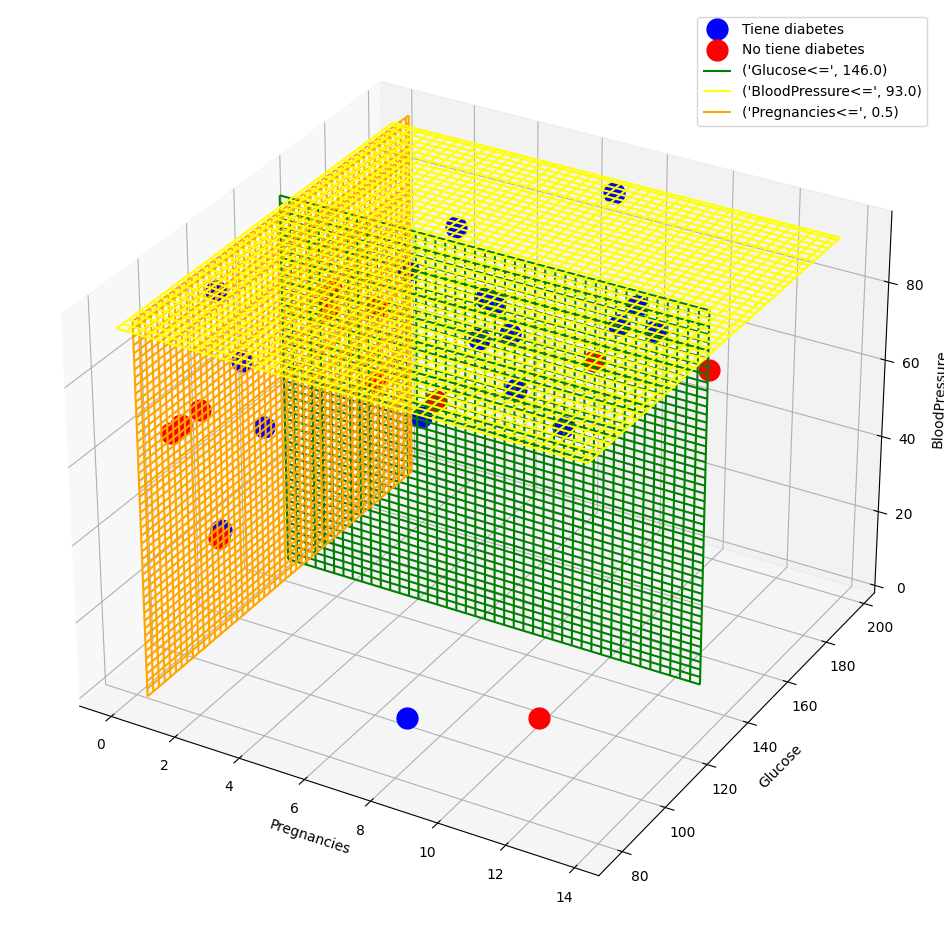

In [19]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111,projection='3d')

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

ax1.set_xlabel('Pregnancies')
ax1.set_ylabel('Glucose')
ax1.set_zlabel('BloodPressure')

# Datos en array bi-dimensional
x_1 = X['Pregnancies'].values[:30]
x_2 = X['Glucose'].values[:30]
x_3 = X['BloodPressure'].values[:30]

count_P = 0
count_N = 0

for i in range(30):
  if y[i] == 0:
    if count_P<1:
      ax1.plot(x_1[i],x_2[i],x_3[i], "o", markersize = 15, color="r", label='No tiene diabetes')
      count_P = 1
    else:
      ax1.plot(x_1[i],x_2[i],x_3[i], "o", markersize = 15, color="r")
  else:
    if count_N<1:
      ax1.plot(x_1[i],x_2[i],x_3[i], "o", markersize = 15, color="b", label='Tiene diabetes')
      count_N = 1
    else:
      ax1.plot(x_1[i],x_2[i],x_3[i], "o", markersize = 15, color="b")

cond.sort()
#condicional 1
x3 = np.arange(x_1.min(), x_1.max(), 0.1)
z3 = np.arange(x_3.min(), x_3.max(), 0.1)
X3,Z3 = np.meshgrid(x3,z3)
Y3 = np.full((960, 130),cond[1][1])
lab = 'Glucose<=', cond[1][1]
ax1.plot_wireframe(X3,Y3,Z3,color='green',label=lab)

#condicional 2
x3 = np.arange(x_3.min(), x_3.max()/7, 0.1)
y3 = np.arange(x_2.min(), x_2.max(), 0.1)
X3,Y3 = np.meshgrid(x3,y3)
Z3 = np.full((1190, 138),cond[0][1])
lab = 'BloodPressure<=', cond[0][1]
ax1.plot_wireframe(X3,Y3,Z3,color='yellow',label=lab)

#condicional 3
y3 = np.arange(x_2.min(), x_2.max(), 0.1)
z3 = np.arange(x_3.min(), x_3.max(), 0.1)
Y3,Z3 = np.meshgrid(y3,z3)
X3 = np.full((960, 1190),cond[2][1])
lab = 'Pregnancies<=', cond[2][1]
ax1.plot_wireframe(X3,Y3,Z3,color='orange',label=lab)

plt.legend()
plt.show()

# PARTE 2

Usando el dataset de housing (train y test)

Implementar y entrenar una regresión lineal con descenso del gradiente creando las siguientes funciones:

def cost_function(y, y_hat): 

def predict(x…w…b):

def get_gradients(x, … y_train, y_hat,w  … b):

def update_params(w, …, b, dw, …, db, learning_rate=0.1)

def reg_lineal(x1.., …, y, niter=100, learning_rate=0.1

**se debe imprimir el costo en cada iteración


##Funciones

In [20]:
'''def cost_function(y, y_hat):
    m = y.shape[0]
    J = 1/(2*m) * np.sum((y_hat - y)**2)
    return J

def predict(x, w, b):
    #x['median_income'] = pd.Series([round(val,2) for val in x['median_income']])
    y_hat = np.dot(x, w) + b
    #y_hat_aux = []
    #for i in y_hat:
    #  y_hat_aux.append(round(i,2))
    #y_hat = y_hat_aux
    #print(y_hat)
    return y_hat

def get_gradients(x, y, y_hat):
    m = y.shape[0]
    dz = y_hat - y
    dw = 1/m * np.dot(x.T, dz)
    db = 1/m * np.sum(dz)
    #dw_aux = []
    #for i in dw:
    #  dw_aux.append(round(i,2))
    #dw = dw_aux
    #db = round(db,2)
    #print(dw, " ",db)
    return dw, db

def update_params(w, b, dw, db, learning_rate=0.1):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

def reg_lineal(x, y, niter, learning_rate):
    m, n = x.shape

    # Inicializa los pesos y el sesgo con valores aleatorios
    w = np.random.randn(n)
    b = np.random.randn()

    # Inicializa la lista de costos
    costs = []

    # Itera n_iter veces
    for i in range(niter):

        # Calcula las predicciones y el costo
        y_hat = predict(x, w, b)
        J = cost_function(y, y_hat)

        # Calcula los gradientes de los pesos y el sesgo
        dw, db = get_gradients(x, y, y_hat)

        # Actualiza los pesos y el sesgo utilizando los gradientes y una tasa de aprendizaje
        w, b = update_params(w, b, dw, db, learning_rate)

        # Agrega el costo actual a la lista de costos
        costs.append(J)

        # Imprime el costo cada iteración
        print(f"Iteración {i}: Costo = {J}")

    # Devuelve los pesos y el sesgo entrenados y la lista de costos
    return w, b, costs'''

'def cost_function(y, y_hat):\n    m = y.shape[0]\n    J = 1/(2*m) * np.sum((y_hat - y)**2)\n    return J\n\ndef predict(x, w, b):\n    #x[\'median_income\'] = pd.Series([round(val,2) for val in x[\'median_income\']])\n    y_hat = np.dot(x, w) + b\n    #y_hat_aux = []\n    #for i in y_hat:\n    #  y_hat_aux.append(round(i,2))\n    #y_hat = y_hat_aux\n    #print(y_hat)\n    return y_hat\n\ndef get_gradients(x, y, y_hat):\n    m = y.shape[0]\n    dz = y_hat - y\n    dw = 1/m * np.dot(x.T, dz)\n    db = 1/m * np.sum(dz)\n    #dw_aux = []\n    #for i in dw:\n    #  dw_aux.append(round(i,2))\n    #dw = dw_aux\n    #db = round(db,2)\n    #print(dw, " ",db)\n    return dw, db\n\ndef update_params(w, b, dw, db, learning_rate=0.1):\n    w = w - learning_rate * dw\n    b = b - learning_rate * db\n    return w, b\n\ndef reg_lineal(x, y, niter, learning_rate):\n    m, n = x.shape\n\n    # Inicializa los pesos y el sesgo con valores aleatorios\n    w = np.random.randn(n)\n    b = np.random.randn()\

In [21]:
def cost_function(y, y_hat):
    m = len(y)
    cost = (1/(2*m)) * np.sum(np.square(y_hat-y))
    return cost

# Función de predicción
def predict(x, w, b):
    y_hat = np.dot(x, w) + b
    return y_hat

# Función para obtener los gradientes
def get_gradients(x, y_train, y_hat, w, b):
    m = len(y_train)
    dw = (1/m) * np.dot(x.T, (y_hat - y_train))
    db = (1/m) * np.sum(y_hat - y_train)
    return dw, db

# Función para actualizar los parámetros w y b
def update_params(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

# Función de regresión lineal
def reg_lineal(x_train, y_train, niter=100, learning_rate=0.1):
    m, n = x_train.shape
    w = np.zeros((n, 1))
    b = 0
    costs = []
    for i in range(niter):
        y_hat = predict(x_train, w, b)
        cost = cost_function(y_train, y_hat)
        dw, db = get_gradients(x_train, y_train, y_hat, w, b)
        w, b = update_params(w, b, dw, db, learning_rate)
        costs.append(cost)
        #print("Iteración {}: costo={}".format(i, cost))
        if i % 10 == 0:
            print(f"Iteración {i}: Costo = {cost}")
    return w, b, costs


def sst(y):
    """Calcula la suma de cuadrados total."""
    return np.sum((y - np.mean(y))**2)

def ssr(y, y_pred):
    """Calcula la suma de cuadrados residual."""
    return np.sum((y - y_pred)**2)

def r2_score(y, y_pred):
    """Calcula el coeficiente de determinación."""
    sst_total = sst(y)
    ssr_residual = ssr(y, y_pred)
    r_squared = 1 - (ssr_residual / sst_total)
    return r_squared

##a) Calcular mse en train y test

### Train

In [22]:
df_train = pd.read_csv('https://raw.githubusercontent.com/estebanrodriguez02/DataSets/main/california_housing_train.csv')
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [23]:
X_train = df_train.drop('median_house_value', axis=1)
y_train = df_train['median_house_value']

Reescala de datos X

In [24]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)

Reescala de datos y

In [25]:
scaler = MinMaxScaler()
scaler.fit(y_train.values.reshape(-1,1))
y_scaled_train = scaler.transform(y_train.values.reshape(-1,1))

In [26]:
w, b, costo = reg_lineal(X_scaled_train, y_scaled_train, 10000, 0.1)

Iteración 0: Costo = 0.10719747446297896
Iteración 10: Costo = 0.029149935529347554
Iteración 20: Costo = 0.026836544224136234
Iteración 30: Costo = 0.02631515946250233
Iteración 40: Costo = 0.025852958241945955
Iteración 50: Costo = 0.025408495600185422
Iteración 60: Costo = 0.024980015380019344
Iteración 70: Costo = 0.024566754702012805
Iteración 80: Costo = 0.024168029580957828
Iteración 90: Costo = 0.023783206673882312
Iteración 100: Costo = 0.02341169680718941
Iteración 110: Costo = 0.023052949875442635
Iteración 120: Costo = 0.02270645049751405
Iteración 130: Costo = 0.022371714301388707
Iteración 140: Costo = 0.02204828473870083
Iteración 150: Costo = 0.021735730346195678
Iteración 160: Costo = 0.021433642384609344
Iteración 170: Costo = 0.021141632796596675
Iteración 180: Costo = 0.020859332434672372
Iteración 190: Costo = 0.02058638951795507
Iteración 200: Costo = 0.020322468283064277
Iteración 210: Costo = 0.020067247800021396
Iteración 220: Costo = 0.01982042092862031
Iterac

In [27]:
# Calcular la precisión en los datos de entrenamiento
y_train_pred = predict(X_scaled_train, w, b)
train_accuracy = r2_score(y_scaled_train, y_train_pred)

print("Precisión en entrenamiento: {:.2f} %".format(round(train_accuracy*100, 2)))

Precisión en entrenamiento: 61.43 %


### Test

In [28]:
df_test = pd.read_csv('https://raw.githubusercontent.com/estebanrodriguez02/DataSets/main/california_housing_test.csv')
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [29]:
X_test = df_test.drop('median_house_value', axis=1)
y_test = df_test['median_house_value']

In [49]:
X_test.shape

(3000, 8)

In [50]:
y_test.shape

(3000,)

Reescala de datos X

In [30]:
scaler = MinMaxScaler()
scaler.fit(X_test)
X_scaled_test = scaler.transform(X_test)

Reescala de datos y

In [31]:
scaler = MinMaxScaler()
scaler.fit(y_test.values.reshape(-1,1))
y_scaled_test = scaler.transform(y_test.values.reshape(-1,1))

In [32]:
w, b, costo = reg_lineal(X_scaled_test, y_scaled_test, 10000, 0.1)

Iteración 0: Costo = 0.10176795705828272
Iteración 10: Costo = 0.028620208931801096
Iteración 20: Costo = 0.026548301170919646
Iteración 30: Costo = 0.026076246362136856
Iteración 40: Costo = 0.025654648433508332
Iteración 50: Costo = 0.02524828112631682
Iteración 60: Costo = 0.024855723167799368
Iteración 70: Costo = 0.02447635401907695
Iteración 80: Costo = 0.024109612737252567
Iteración 90: Costo = 0.0237549767673246
Iteración 100: Costo = 0.023411957436871345
Iteración 110: Costo = 0.02308009637904726
Iteración 120: Costo = 0.022758962448583497
Iteración 130: Costo = 0.022448149050485193
Iteración 140: Costo = 0.022147271820025356
Iteración 150: Costo = 0.021855966602299118
Iteración 160: Costo = 0.02157388768759174
Iteración 170: Costo = 0.02130070626553454
Iteración 180: Costo = 0.021036109066682476
Iteración 190: Costo = 0.020779797164916004
Iteración 200: Costo = 0.02053148491809096
Iteración 210: Costo = 0.02029089902775291
Iteración 220: Costo = 0.02005777770159742
Iteración 

In [33]:
# Calcular la precisión en los datos de entrenamiento
y_test_pred = predict(X_scaled_test, w, b)
test_accuracy = r2_score(y_scaled_test, y_test_pred)

print("Precisión en prueba: {:.2f} %".format(round(test_accuracy*100, 2)))

Precisión en prueba: 61.31 %


##b) Utilizar SGDRegressor y LinearRegression SKLearn para crear otros 2 modelos. Revisar valores de costo, y evaluar mse en train y test. Analizar coeficientes y resultados. Comparar con los obtenidos por su código.

### SGDRegressor

In [34]:
# Crear modelo con SGDRegressor
sgd_model = SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_scaled_train, y_scaled_train.ravel())

# Calcular el costo y la precisión en el conjunto de entrenamiento y prueba
sgd_train_cost = sgd_model.score(X_scaled_train, y_scaled_train)
sgd_test_cost = sgd_model.score(X_scaled_test, y_scaled_test)
sgd_train_mse = mean_squared_error(y_scaled_train, sgd_model.predict(X_scaled_train))
sgd_test_mse = mean_squared_error(y_scaled_test, sgd_model.predict(X_scaled_test))

# Imprimir resultados
print("SGDRegressor:")
print(" Costo en entrenamiento:", round(sgd_train_cost*100, 2), " %")
print(" Costo en prueba:", round(sgd_test_cost*100, 2), " %")
print(" Precisión en entrenamiento:", round(sgd_train_mse*100, 2), " %")
print(" Precisión en prueba:", round(sgd_test_mse*100, 2), " %")

SGDRegressor:
 Costo en entrenamiento: 55.08  %
 Costo en prueba: 53.0  %
 Precisión en entrenamiento: 2.57  %
 Precisión en prueba: 2.64  %


In [35]:
'''# Crear modelo con SGDRegressor
sgd_model = SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train, y_train)

# Calcular el costo y la precisión en el conjunto de entrenamiento y prueba
sgd_train_cost = sgd_model.score(X_train, y_train)
sgd_test_cost = sgd_model.score(X_test, y_test)
sgd_train_mse = mean_squared_error(y_train, sgd_model.predict(X_train))
sgd_test_mse = mean_squared_error(y_test, sgd_model.predict(X_test))

# Imprimir resultados
print("SGDRegressor:")
print(" Costo en entrenamiento:", round(sgd_train_cost*100, 2), " %")
print(" Costo en prueba:", round(sgd_test_cost*100, 2), " %")
print(" Precisión en entrenamiento:", round(sgd_train_mse*100, 2), " %")
print(" Precisión en prueba:", round(sgd_test_mse*100, 2), " %")'''

'# Crear modelo con SGDRegressor\nsgd_model = SGDRegressor(loss=\'squared_error\', max_iter=1000, tol=1e-3, random_state=42)\nsgd_model.fit(X_train, y_train)\n\n# Calcular el costo y la precisión en el conjunto de entrenamiento y prueba\nsgd_train_cost = sgd_model.score(X_train, y_train)\nsgd_test_cost = sgd_model.score(X_test, y_test)\nsgd_train_mse = mean_squared_error(y_train, sgd_model.predict(X_train))\nsgd_test_mse = mean_squared_error(y_test, sgd_model.predict(X_test))\n\n# Imprimir resultados\nprint("SGDRegressor:")\nprint(" Costo en entrenamiento:", round(sgd_train_cost*100, 2), " %")\nprint(" Costo en prueba:", round(sgd_test_cost*100, 2), " %")\nprint(" Precisión en entrenamiento:", round(sgd_train_mse*100, 2), " %")\nprint(" Precisión en prueba:", round(sgd_test_mse*100, 2), " %")'

In [36]:
print("Coeficientes de SGDRegressor:")
index = 0
max_index = 0
most_important = "" 
for i in X_train.columns:
  print(" ",i, ": ", round(sgd_model.coef_[index], 2))
  if sgd_model.coef_[index] > max_index:
    max_index = sgd_model.coef_[index]
    most_important = i
  index += 1
print("La variable mas influyente en el modelo es", most_important) 

Coeficientes de SGDRegressor:
  longitude :  -0.22
  latitude :  -0.25
  housing_median_age :  0.17
  total_rooms :  0.1
  total_bedrooms :  0.1
  population :  -0.02
  households :  0.1
  median_income :  1.06
La variable mas influyente en el modelo es median_income


### LinearRegression

In [37]:
# Crear modelo con LinearRegression
lr_model = LinearRegression()
#lr_model = LinearRegression()
lr_model.fit(X_scaled_test, y_scaled_test)

# Calcular el costo y la precisión en el conjunto de entrenamiento y prueba
lr_train_cost = lr_model.score(X_scaled_train, y_scaled_train)
lr_test_cost = lr_model.score(X_scaled_test, y_scaled_test)
#lr_train_mse = np.mean((y_scaled_train - lr_model.predict(X_scaled_train))**2)
lr_train_mse = mean_squared_error(y_scaled_train, lr_model.predict(X_scaled_train))
lr_test_mse = mean_squared_error(y_scaled_test, lr_model.predict(X_scaled_test))

# Imprimir resultados
print("LinearRegression:")
print(" Costo en entrenamiento:", round(lr_train_cost*100, 2), " %")
print(" Costo en prueba:", round(lr_test_cost*100, 2), " %")
print(" Precisión en entrenamiento:", round(lr_train_mse*100, 2), " %")
print(" Precisión en prueba:", round(lr_test_mse*100, 2), " %")

LinearRegression:
 Costo en entrenamiento: 56.96  %
 Costo en prueba: 62.03  %
 Precisión en entrenamiento: 2.46  %
 Precisión en prueba: 2.13  %


In [38]:
'''# Crear modelo con LinearRegression
lr_model = LinearRegression()
#lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Calcular el costo y la precisión en el conjunto de entrenamiento y prueba
lr_train_cost = lr_model.score(X_train, y_train)
lr_test_cost = lr_model.score(X_test, y_test)
#lr_train_mse = np.mean((y_scaled_train - lr_model.predict(X_scaled_train))**2)
lr_train_mse = mean_squared_error(y_train, lr_model.predict(X_train))
lr_test_mse = mean_squared_error(y_test, lr_model.predict(X_test))

# Imprimir resultados
print("LinearRegression:")
print(" Costo en entrenamiento:", round(lr_train_cost*100, 2), " %")
print(" Costo en prueba:", round(lr_test_cost*100, 2), " %")
print(" Precisión en entrenamiento:", round(lr_train_mse*100, 2), " %")
print(" Precisión en prueba:", round(lr_test_mse*100, 2), " %")'''

'# Crear modelo con LinearRegression\nlr_model = LinearRegression()\n#lr_model = LinearRegression()\nlr_model.fit(X_train, y_train)\n\n# Calcular el costo y la precisión en el conjunto de entrenamiento y prueba\nlr_train_cost = lr_model.score(X_train, y_train)\nlr_test_cost = lr_model.score(X_test, y_test)\n#lr_train_mse = np.mean((y_scaled_train - lr_model.predict(X_scaled_train))**2)\nlr_train_mse = mean_squared_error(y_train, lr_model.predict(X_train))\nlr_test_mse = mean_squared_error(y_test, lr_model.predict(X_test))\n\n# Imprimir resultados\nprint("LinearRegression:")\nprint(" Costo en entrenamiento:", round(lr_train_cost*100, 2), " %")\nprint(" Costo en prueba:", round(lr_test_cost*100, 2), " %")\nprint(" Precisión en entrenamiento:", round(lr_train_mse*100, 2), " %")\nprint(" Precisión en prueba:", round(lr_test_mse*100, 2), " %")'

In [39]:
print("Coeficientes de LinearRegression:")
index = 0
max_index = 0
most_important = "" 
for i in X_train.columns:
  print(" ",i, ": ", round(lr_model.coef_[0][index], 2))
  if lr_model.coef_[0][index] > max_index:
    max_index = lr_model.coef_[0][index]
    most_important = i
  index += 1
print("La variable mas influyente en el modelo es", most_important) 

Coeficientes de LinearRegression:
  longitude :  -0.87
  latitude :  -0.83
  housing_median_age :  0.13
  total_rooms :  -0.51
  total_bedrooms :  1.15
  population :  -0.93
  households :  0.56
  median_income :  1.2
La variable mas influyente en el modelo es median_income


Analisis:

##c) Crear un modelo usando sólo las variables longitud y latitud y graficar las muestras y  el plano resultante.

###Muestras

In [40]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

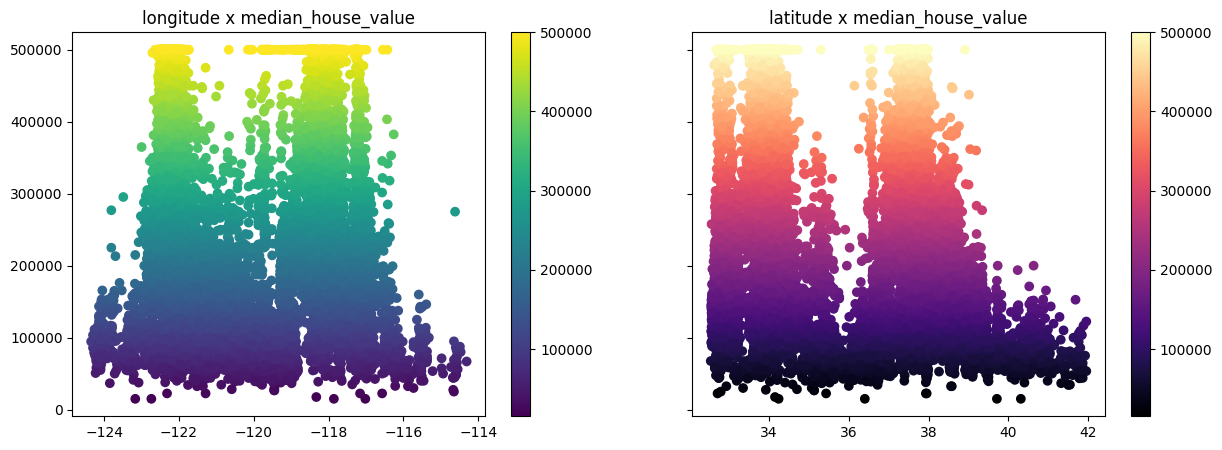

In [41]:
fig, ax = plt.subplots(1, 2, sharey = True)

ax[0].set_title("longitude x median_house_value")
im1 = ax[0].scatter(X["longitude"], y, c=y, cmap='viridis')

ax[1].set_title("latitude x median_house_value")
im2 = ax[1].scatter(X["latitude"], y, c=y, cmap='magma')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
# Agregar la barra de color a la primera subparcela
fig.colorbar(im1, ax=ax[0])
# Agregar la barra de color a la segunda subparcela
fig.colorbar(im2, ax=ax[1])

plt.show()

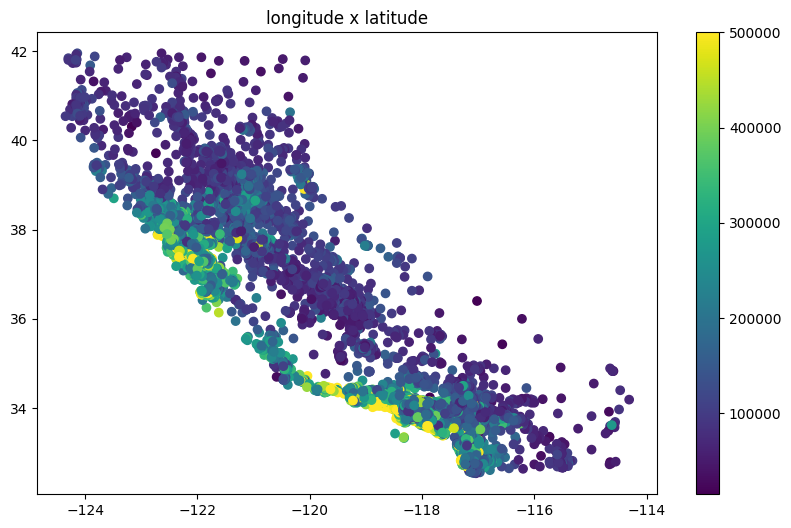

In [42]:
plt.figure(figsize=(10,6))

plt.title("longitude x latitude")
plt.scatter(X['longitude'], X['latitude'], c=y, cmap='viridis')

plt.colorbar()
plt.show()

###Frontera de decision

In [43]:
modeloA2 = DecisionTreeClassifier(max_depth=2, criterion="entropy")
arbol2 = modeloA2.fit(X[["longitude", "latitude"]], y)

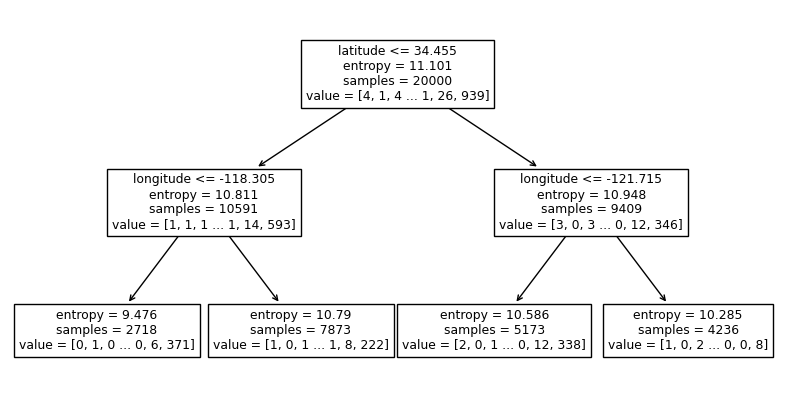

In [44]:
plt.figure(figsize=(10,5))
plot_tree(arbol2,feature_names=modeloA2.feature_names_in_)
plt.show()

In [45]:
texto_modelo = export_text(
                    decision_tree = arbol2,
                    feature_names = list(X[["longitude", "latitude"]])
               )
texto_modelo = texto_modelo.replace("|",'')

In [46]:
texto_modelo = texto_modelo.replace(" ",'')
extract = texto_modelo.split('\n')
extract.pop(len(extract)-1)
to_delete = []
for i in extract:
  if 'class' in i:
    to_delete.append(i)
  if '>' in i:
    to_delete.append(i)
for i in to_delete:
  extract.remove(i)
cond = []
for i in extract:
  cond.append(i.split('<='))
for i in range(len(cond)):
  cond[i][0] = cond[i][0].replace("-","")
  cond[i][1] = float(cond[i][1])
cond

[['latitude', 34.45], ['longitude', -118.31], ['longitude', -121.72]]

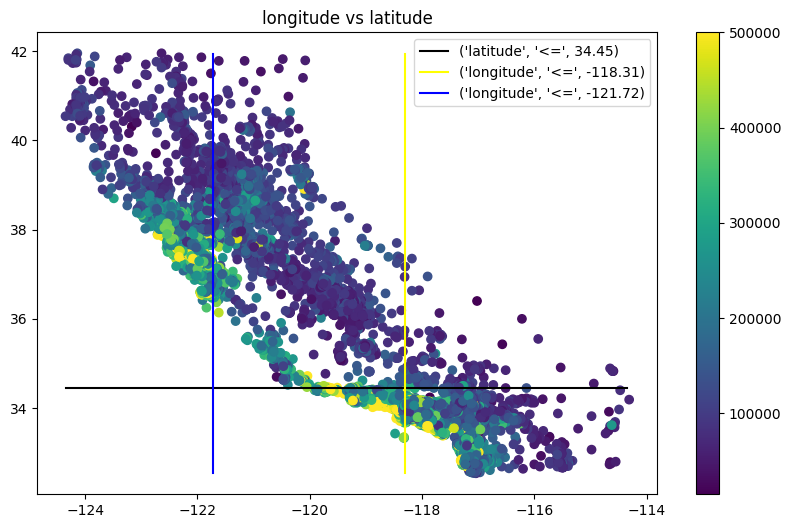

In [47]:
plt.figure(figsize=(10,6))

plt.title("longitude vs latitude")
plt.scatter(X['longitude'], X['latitude'], c=y, cmap='viridis')

x_aux = np.arange(X["longitude"].min(), X["longitude"].max(), 0.1).tolist()
y_aux = [cond[0][1]]*len(x_aux)
plt.plot(x_aux,y_aux, c="black", label=(cond[0][0],"<=",cond[0][1]))

y_aux = np.arange(X["latitude"].min(), X["latitude"].max(), 0.1).tolist()
x_aux = [cond[1][1]]*len(y_aux)
plt.plot(x_aux,y_aux, c="yellow", label=(cond[1][0],"<=",cond[1][1]))

x_aux = [cond[2][1]]*len(y_aux)
plt.plot(x_aux,y_aux, c="blue", label=(cond[2][0],"<=",cond[2][1]))

plt.colorbar()
plt.legend()
plt.show()

###Linea de regresion

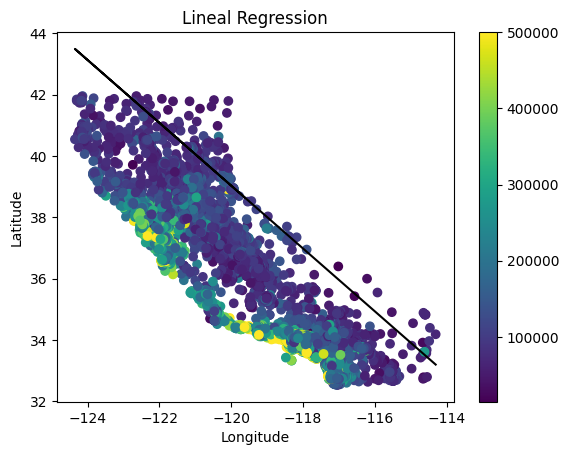

In [48]:
X = X[['longitude', 'latitude']]

# Crear una instancia del modelo de regresión lineal
lr = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
lr.fit(X, y)

# Graficar los datos de entrenamiento y la línea de regresión lineal
plt.scatter(X['longitude'], X['latitude'], c=y, cmap='viridis')
plt.plot(X['longitude'], (-lr.intercept_ - lr.coef_[0] * X['longitude']) / lr.coef_[1], color='black')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lineal Regression')
plt.show()